In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
trainDB = pd.read_csv('/Users/helena/Documents/EE5111/train_FD001.txt',
                      delim_whitespace=True, header=None)
sensor_name = ['s' + str(i) for i in range(1, 22)]
column_list = ['id', 'te', 'os1', 'os2', 'os3'] + sensor_name
df = pd.DataFrame(trainDB.values, columns=column_list)
# overwrite column'id' of the engine as 'FD001'+id
df['id'] = df['id'].map(lambda s: 'FD001_' + str(s))
# describe the dataframe 1
df.describe()

,te,os1,os2,os3,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [3]:
# evaluate the life value of each engine
# eingine 1
g1 = df.reset_index().groupby(['id'])['te'].idxmax()
jet1 = df.iloc[g1]
histogram1 = jet1.loc[:,'te']
print('Max life of fd001:', histogram1.max())
print('Min life of fd001:', histogram1.min())
print('Average life of fd001:', histogram1.mean())

Max life of fd001: 362.0
Min life of fd001: 128.0
Average life of fd001: 206.31


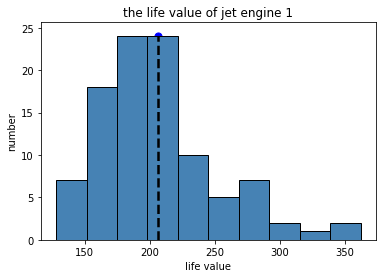

In [4]:
# histogram
plt.hist(histogram1, color = 'steelblue', edgecolor = 'k')
x0 = histogram1.mean()
y0 = 24
plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=2.5)
# set dot styles
plt.scatter([x0, ], [y0, ], s=50, color='b')
plt.xlabel('life value')
plt.ylabel('number')
plt.title('the life value of jet engine 1')
plt.show()

Text(0.5,1,'signal from sensor 3 in 1 cycle')

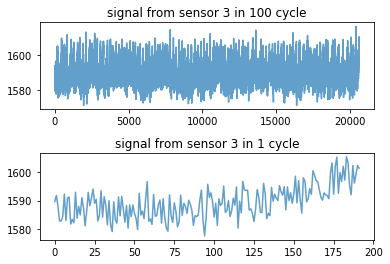

In [5]:
# evaluate each single sensor
# take s3 as an exmaple
s3 = df.loc[:,'s3']
plt.figure(1)
plt.subplot(211)
plt.title('signal from sensor 3 in 100 cycle')
plt.plot(s3, alpha=0.7)
s3_c1 = df.loc[df.id == 'FD001_1.0', 's3']
plt.subplots_adjust(hspace = 0.5)
plt.subplot(212)
plt.plot(s3_c1,  alpha=0.7)
plt.title('signal from sensor 3 in 1 cycle')


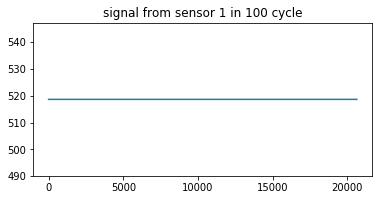

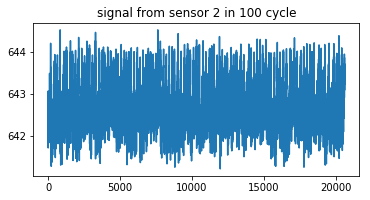

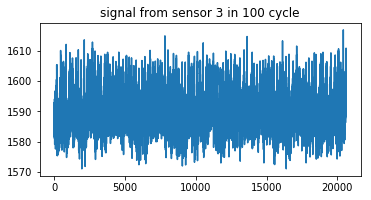

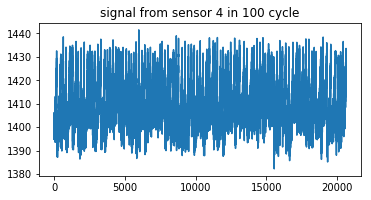

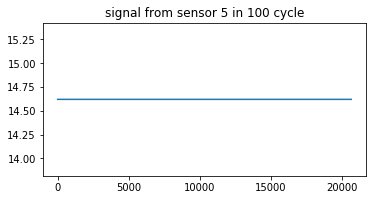

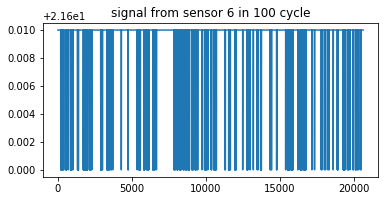

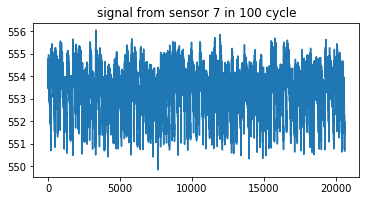

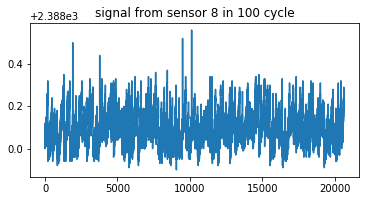

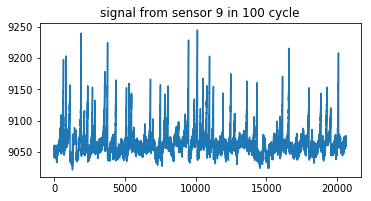

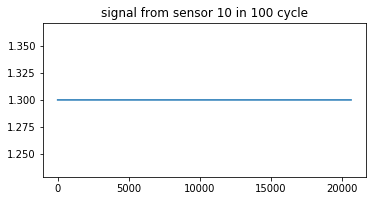

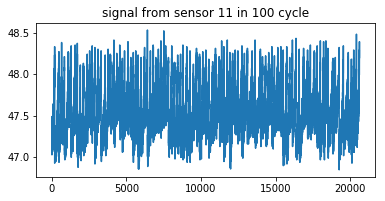

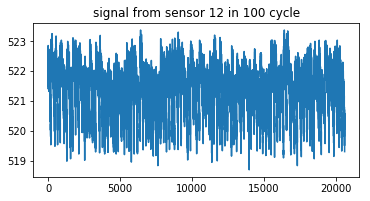

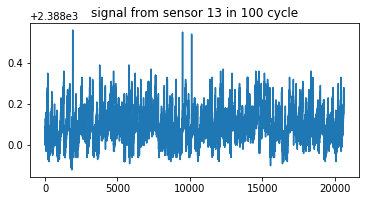

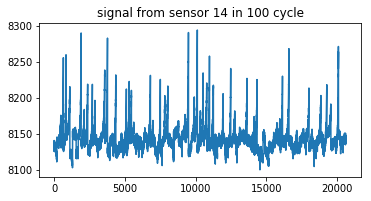

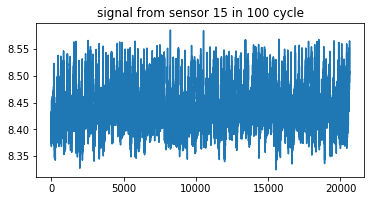

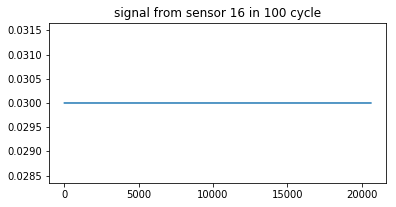

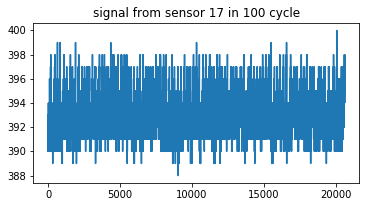

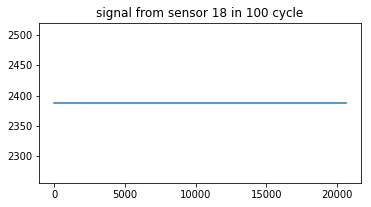

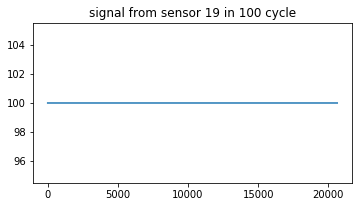

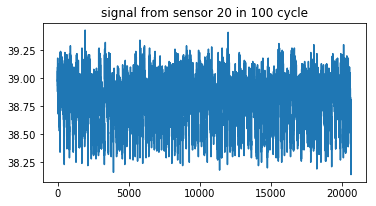

In [6]:
# observe other performance of the sensor
sensors = {} 
# fig, ax = plt.subplots(4, 5, sharex = 'col', sharey = 'row')

for i in range(1, 21):
    fig = plt.figure(figsize = (25, 10))
    sensors['s' + str(i)] = df.loc[:, 's' + str(i)]
    ax = fig.add_subplot(4, 5, i)
    plt.plot(sensors['s'+ str(i)])
    plt.tight_layout()
    plt.title('signal from sensor %d in 100 cycle'%i)
    


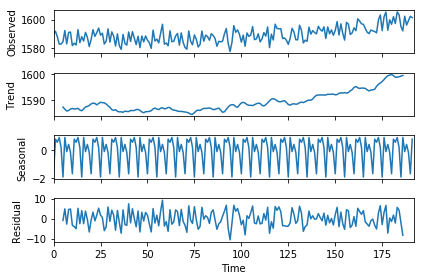

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(s3_c1.values, freq = 10)
resplot = res.plot()

power size: 95


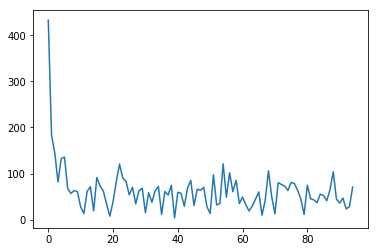

In [8]:
# smoothing techniques
from scipy import fftpack

# plot fft graph
sample_freq = fftpack.fftfreq(s3_c1.size, d = 1) # the Discrete Fourier Transform sample frequencies
sig_fft = fftpack.fft(s3_c1)
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]
print('power size:', power.size)
plt.plot(power)
# calculate 1st frequency mode and filter other high frequency noise
freq = freqs[power.argmax()]

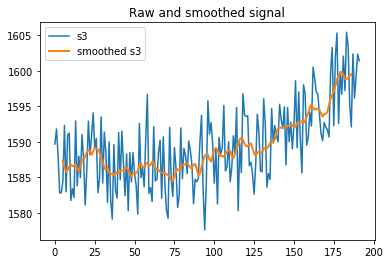

In [9]:
# access individual series 
trend = res.trend
seasonal = res.seasonal
residual = res.resid

line_1 = plt.plot(s3_c1, label = 's3')
line_2 = plt.plot(trend, label = 'smoothed s3', linewidth = 2)
plt.title('Raw and smoothed signal')
plt.legend()
plt.show()

In [10]:
trainDB2 = pd.read_csv('/Users/helena/Documents/EE5111/train_FD002.txt',
                      delim_whitespace=True, header=None)
sensor_name = ['s' + str(i) for i in range(1, 22)]
column_list = ['id', 'te', 'os1', 'os2', 'os3'] + sensor_name
df2 = pd.DataFrame(trainDB2.values, columns=column_list)
# overwrite column'id' of the engine as 'FD001'+id
df2['id'] = df2['id'].map(lambda s: 'FD002_' + str(s))
# describe the dataframe 1
df2.describe()

,te,os1,os2,os3,s1,s2,s3,s4,s5,s6,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,11.600746,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,5.431802,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,5.710000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,5.720000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,9.030000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,15.490000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,21.610000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


In [11]:
# evaluate the life value of each engine
# eingine 2
g2 = df2.reset_index().groupby(['id'])['te'].idxmax()
jet2 = df2.iloc[g2]
histogram2 = jet2.loc[:,'te']
print('Max life of fd002:', histogram2.max())
print('Min life of fd002:', histogram2.min())
print('Average life of fd002:', histogram2.mean())

Max life of fd002: 378.0
Min life of fd002: 128.0
Average life of fd002: 206.76538461538462


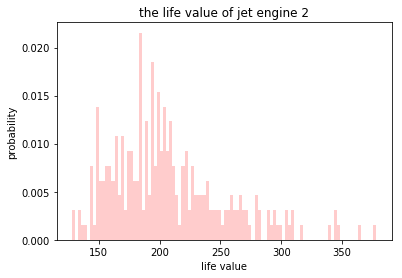

In [12]:
# jet engine 2
n2, bins2, patches2 = plt.hist(histogram2, 100,density=True, facecolor='r', alpha=0.2)
plt.xlabel('life value')
plt.ylabel('probability')
plt.title('the life value of jet engine 2')
plt.show()

Text(0.5,1,'signal from sensor 3 in 1 cycle')

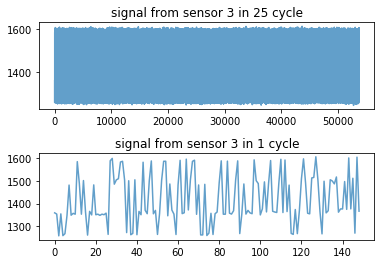

In [13]:
s3_2 = df2.loc[:,'s3']
plt.figure(1)
plt.subplot(211)
plt.title('signal from sensor 3 in 25 cycle')
plt.plot(s3_2, alpha=0.7)
s3_c1_2 = df2.loc[df2.id == 'FD002_1.0', 's3']
plt.subplots_adjust(hspace = 0.5)
plt.subplot(212)
plt.plot(s3_c1_2,  alpha=0.7)
plt.title('signal from sensor 3 in 1 cycle')

[]

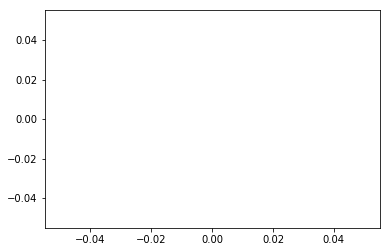

In [14]:
# plot out the time evolution
plt.plot()

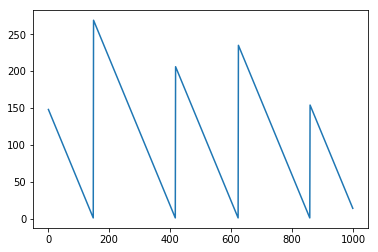

In [15]:
# investigate jet2 remaining useful life
def f2(col):
    return col[::-1]
df2['rul'] = df2[['id','te']].groupby('id').transform(f2)
plt.plot(df2.rul[1:1000])


In [16]:
y = df2['rul']
features = df2.columns.drop(['id', 'te', 'rul'])
features

Index(['os1', 'os2', 'os3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',
       's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18',
       's19', 's20', 's21'],
      dtype='object')

In [17]:
from sklearn.preprocessing import normalize
# prepare data and then split the dataset
from sklearn.cross_validation import train_test_split
X = pd.DataFrame(normalize(df2[features]))
X.columns = features
X.head()
# X.shape (53759, 24)

/Users/helena/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,os1,os2,os3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,0.002822,0.000068,0.008063,0.036240,0.044777,0.109549,0.091698,0.000442,0.000645,0.015694,...,0.014761,0.192529,0.648981,0.000754,0.000002,0.026931,0.179248,0.008063,0.001188,0.000710
1,0.003391,0.000068,0.008075,0.035933,0.044403,0.109269,0.090904,0.000316,0.000461,0.011184,...,0.010531,0.192798,0.651818,0.000757,0.000002,0.026647,0.178613,0.008075,0.000841,0.000506
2,0.002108,0.000052,0.005059,0.038998,0.045302,0.105961,0.088314,0.000594,0.000761,0.014815,...,0.013846,0.170990,0.663112,0.000919,0.000002,0.026053,0.161460,0.007161,0.001187,0.000731
3,0.003393,0.000068,0.008076,0.035939,0.044380,0.109355,0.090969,0.000316,0.000461,0.011182,...,0.010557,0.192829,0.651644,0.000755,0.000002,0.026571,0.178646,0.008076,0.000855,0.000523
4,0.002109,0.000052,0.005062,0.039024,0.045312,0.106111,0.088413,0.000595,0.000762,0.014769,...,0.013863,0.171100,0.663242,0.000919,0.000002,0.026070,0.161566,0.007165,0.001192,0.000720


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
print('X_train_set', X_train.shape)
print('y_train_set', y_train.shape)
print('X_test_set', X_test.shape)
print('y_test_set', y_test.shape)

X_train_set (37631, 24)
y_train_set (37631,)
X_test_set (16128, 24)
y_test_set (16128,)


In [19]:
# random forest tree
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 12)
rf = rf.fit(X_train, y_train)

In [20]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

Text(0.5,1,'Feature Importances')

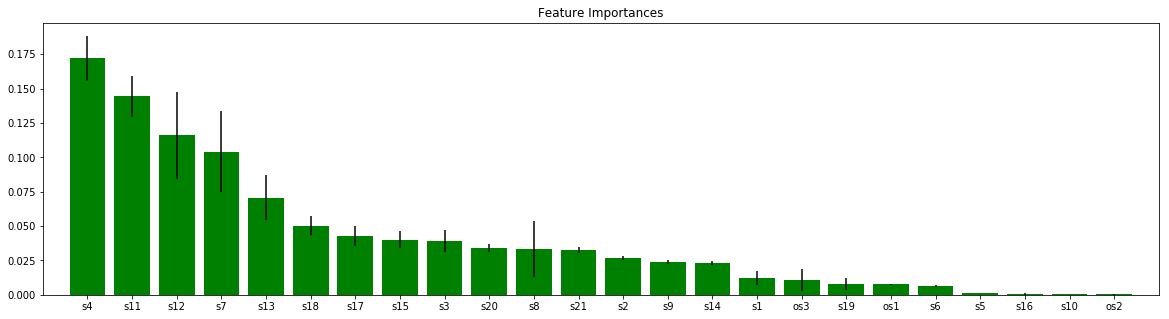

In [21]:
plt.figure(figsize=(20,5))
plt.bar(range(X_train.shape[1]), importances[indices], color = 'g', yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.title("Feature Importances")

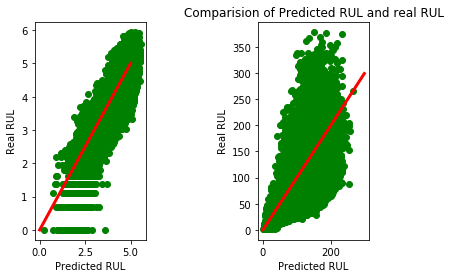

In [22]:
# compare predict RUL and real RUL
plt.subplot(1,2,1)
plt.plot(np.log(rf.predict(X_test)), np.log(y_test), 'go')
plt.xlabel('Predicted RUL')
plt.ylabel('Real RUL')
plt.plot(range(6), range(6), color = 'r', linewidth = 3)
plt.subplot(1,2,2)
plt.subplots_adjust(wspace = 1)
plt.plot(rf.predict(X_test), y_test, 'go')
plt.xlabel('Predicted RUL')
plt.ylabel('Real RUL')
plt.title('Comparision of Predicted RUL and real RUL')
plt.plot(range(300), range(300), color = 'r', linewidth = 3)